# Covid model
This model is build drawing inspiration from SEIR model

In [14]:
"""
@author: Saransh Srivastava

-Parameter estimation of SEIR differential equation models  using Covid- 19 data

"""
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import pandas as pd


## Data import

In [15]:
#URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'

URL_DATASET =r'https://covid.ourworldindata.org/data/owid-covid-data.csv'
covnatdf = pd.read_csv(URL_DATASET)
#covnatdf[covnatdf.location=='United States']
noOfDatapt = 90
covnatdf
covnatdf[covnatdf.location=='United Kingdom'].tail(10)


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
7011,GBR,United Kingdom,2020-05-21,248293,-525,35704,363,3657.499,-7.734,525.941,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
7012,GBR,United Kingdom,2020-05-22,250908,2615,36042,338,3696.020,38.520,530.919,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
7013,GBR,United Kingdom,2020-05-23,254195,3287,36393,351,3744.439,48.419,536.090,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
7014,GBR,United Kingdom,2020-05-24,257154,2959,36675,282,3788.027,43.588,540.244,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
7015,GBR,United Kingdom,2020-05-25,259559,2405,36793,118,3823.454,35.427,541.982,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
7016,GBR,United Kingdom,2020-05-26,261184,1625,36914,121,3847.391,23.937,543.765,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
7017,GBR,United Kingdom,2020-05-27,265227,4043,37048,134,3906.947,59.556,545.738,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
7018,GBR,United Kingdom,2020-05-28,267240,2013,37460,412,3936.599,29.653,551.807,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
7019,GBR,United Kingdom,2020-05-29,269127,1887,37837,377,3964.396,27.797,557.361,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
7020,GBR,United Kingdom,2020-05-30,271222,2095,38161,324,3995.257,30.861,562.134,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54


In [16]:
covnatdf=covnatdf[covnatdf.iso_code=="GBR"] #USA,ESP,ITA,KOR,GBR
data_death = covnatdf["total_deaths_per_million"].tail(noOfDatapt)
data_infection = covnatdf["total_cases_per_million"].tail(noOfDatapt)
data_death

6931      0.000
6932      0.000
6933      0.000
6934      0.000
6935      0.000
6936      0.015
6937      0.029
6938      0.029
6939      0.044
6940      0.103
6941      0.103
6942      0.133
6943      0.147
6944      0.412
6945      0.633
6946      0.957
6947      1.193
6948      1.694
6949      2.327
6950      2.858
6951      3.683
6952      4.198
6953      5.288
6954      7.483
6955     10.223
6956     12.919
6957     17.102
6958     21.433
6959     24.585
6960     30.095
         ...   
6991    394.352
6992    405.238
6993    414.386
6994    419.026
6995    423.268
6996    433.477
6997    443.037
6998    450.977
6999    460.198
7000    465.295
7001    469.243
7002    472.336
7003    481.572
7004    488.849
7005    495.154
7006    500.810
7007    507.704
7008    510.208
7009    512.565
7010    520.593
7011    525.941
7012    530.919
7013    536.090
7014    540.244
7015    541.982
7016    543.765
7017    545.738
7018    551.807
7019    557.361
7020    562.134
Name: total_deaths_per_m

In [26]:
from scipy.integrate import odeint

t = np.linspace(0, noOfDatapt-1, noOfDatapt) # Grid of time points (in days)
Ppl = covnatdf.population.unique()[0]
#Ppl = np.sqrt(Ppl)
Ppl = 1000000
Ppl

1000000

## Parameter setting

In [18]:
S = [Ppl/2,Ppl/2]       #Group1 use preventive measures, group2 doesn't
E = [0,0]
I = 1                   #number of infected people.
D = 0                   #number of death.
R = 0                   #number of recovery
p_grp=0.6               #Rate of people in group i. Either person takes precaution or not
p_s = 0.7                 #Rate of: people is normal.
lmbda = 2000            #Population inflow
mu = 1000               # Population outflow.
beta = 1.5              #Average risk per infected contact (R_0)
c = 1.1                 #Average contacts per person per day (function of policies & time) (<1 means no spread of disease)
sigma = 5               #Incubation rate, at which infected people develops symptoms.
M01 = 0.0               #Per capita rate of migration of suspectible people from group i to j.
M10 = 0.0
N01 = 0.0               #Per capita rate of migration of infected ones from group i to j.
N10 = 0.5
p_d = 0.0001            #The rate of death.
p_r = 0.0002            #The rate of recovery.
alpha = 0

"""
Converting above variables into parameters for the linear equation
"""

initCond = (S[0],S[1],E[0],E[1],I,R,D)

initCond

(50000.0, 50000.0, 0, 0, 1, 0, 0)

## SEIR Model Creation

In [19]:
def deriv(y,t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10):
    S[0],S[1],E[0],E[1],I,R,D=y
    dS1dt = (p_grp * p_s * (lmbda - mu)) - (beta * c * alpha * S[0] *(alpha * (E[0] + I) + E[1]))/Ppl + (M10 * S[1]) - (M01 * S[0])                       
    ds2dt = ((1-p_grp) * p_s * (lmbda - mu)) - (beta * c * S[1] *(alpha * (E[0] + I) + E[1]))/Ppl + (M01 * S[0]) - (M10 * S[1])                       
    de1dt = (p_grp * (1 - p_s) * (lmbda - mu)) + (beta * c * alpha * S[0] *(alpha * (E[0] + I) + E[1]))/Ppl + (N10 * E[1]) - ((N01 + sigma) * E[0])                       
    de2dt = ((1-p_grp) * (1 - p_s) * (lmbda - mu)) + (beta * c * S[1] *(alpha * (E[0] + I) + E[1]))/Ppl + (N01 * E[0]) - ((N10 + sigma) * E[1])                       
    didt = (sigma *(E[0] + E[1])) - (p_r + p_d) * I 
    dddt = p_d * I
    drdt = p_r * I
    return dS1dt, ds2dt, de1dt,de2dt,didt,dddt,drdt


## Curve Fitting

In [20]:
from scipy.optimize import curve_fit

def iModSol(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10,initCondn):
    y0 = initCondn
    ret = odeint(deriv, y0, t,args=(beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10))
    return ret

def ModSolDeath(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10,initCondn):
    ret = iModSol(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10,initCondn)
    S1,S2,E1,E2,I,D,R = ret.T
    return D

def ModSolSEIR(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10,initCondn):
    ret = iModSol(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10,initCondn)
    return ret

def ModSolD(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10):
    return ModSolDeath(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10,initCond)

def ModSolSIR(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10):
    return ModSolSEIR(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10,initCond)


t2 = np.linspace(0, 199, 200) # Grid of time points (in days

In [21]:

#popt,pcov=curve_fit(ModSolD,t,data_death,bounds=(0.0001,[4,4,1,1,1,0.2,0.5,0.02,0.2]))

#popt,pcov=curve_fit(ModSolD,t,data_death,bounds=(0.0001,[4,4,0.5,1,0.02,0.2,1,0.2,1])) #USA fit parameter
popt,pcov=curve_fit(ModSolD,t,data_death,bounds=((0.0001),[4,4,0.5,0.9,0.02,0.2,1,0.14,1])) #KOR fit parameter
#beta,c,alpha,p_s,p_d,p_r,p_grp
#(0.0001,[4,4,1,1,1,0.2,0.5,0.02,0.2]))

beta_d = popt[0]
c_d = popt[1]
alpha_d = popt[2]
p_s_d = popt[3] #Probability of people being normal
p_d_d = popt[4]
p_r_d = popt[5]
p_grp_d = popt[6] #Probability of people in group 1(ppl following orders)
sigma_d = popt[7] #Assuming a person develops symptom in 6-7 days
N10_d = popt[8] #Rate of migration of people when infected from not following to following rules


#model_final_dead = ModSolD(t2,beta_d,c_d,lmbda_d,mu_d,alpha_d,p_s_d,p_d_d,p_r_d,p_grp_d)

model_final_SIR = ModSolSIR(t2,beta_d,c_d,alpha_d,p_s_d,p_d_d,p_r_d,p_grp_d,sigma_d,N10_d)
popt

array([6.32332244e-01, 6.32332244e-01, 5.00000000e-01, 9.00000000e-01,
       4.23174307e-04, 1.14733931e-01, 1.00686702e-04, 1.18079773e-01,
       1.00000000e+00])

In [22]:
def PlotStyle(Axes,Title):
    
    Axes.spines['top'].set_visible(False)
    Axes.spines['right'].set_visible(False)
    Axes.spines['bottom'].set_visible(True)
    Axes.spines['left'].set_visible(True)
    Axes.xaxis.set_tick_params(labelsize=14)
    Axes.yaxis.set_tick_params(labelsize=14)
    Axes.set_title(Title)

In [23]:
final_model_plot=pd.DataFrame(model_final_SIR)
final_model_plot

,0,1,2,3,4,5,6
0,50000.000000,50000.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,49995.404222,50890.425736,41.032690,66.907581,6.891309,0.001244,0.337218
2,49982.149854,51762.905111,129.373041,99.573706,24.943964,0.007549,2.046775
3,49960.017807,52616.367959,240.993239,121.819920,55.247597,0.024082,6.529395
4,49927.980239,53448.015877,369.321183,142.411488,98.014553,0.056065,15.200594
5,49884.577678,54254.026252,514.210762,164.811546,153.748842,0.108864,29.516055
6,49828.026055,55029.734196,678.072735,190.656698,223.312759,0.188139,51.009417
7,49756.224809,55769.616775,864.556964,221.002310,307.963546,0.299991,81.335605
8,49666.726780,56467.197340,1078.146896,256.774071,409.385785,0.451147,122.317981
9,49556.691755,57114.914027,1324.081587,298.935743,529.728310,0.649140,175.999438


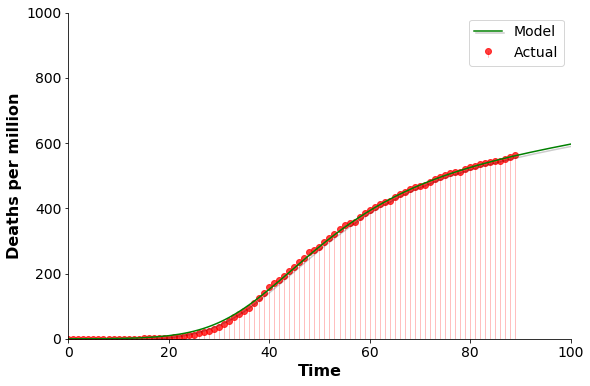

In [24]:
###
#  Curve visualization for dead
###

import matplotlib.patheffects as path_effects

plt.figure(2,figsize=(9,6))

(markers, stemlines, baseline) = plt.stem(t, data_death,bottom=-42,label='Actual',basefmt=" ")
plt.setp(stemlines, linestyle="-", color="red", linewidth=0.5,alpha=0.5 )
plt.setp(markers, color="red",alpha=0.75 )


SolutionLabel = r'Dead Per million'

plt.plot(t2,final_model_plot[5],'g-',label='Model',path_effects=[path_effects.SimpleLineShadow(alpha=0.2,rho=0.2),
                       path_effects.Normal()])

    
plt.xlabel('Time',fontsize=16,fontweight='bold')
plt.ylabel('Deaths per million',fontsize=16,fontweight='bold')
plt.legend(loc=0,fontsize=14)

plt.ylim(0,1000)
plt.xlim(0,100)


ax=plt.gca()
PlotStyle(ax,'')

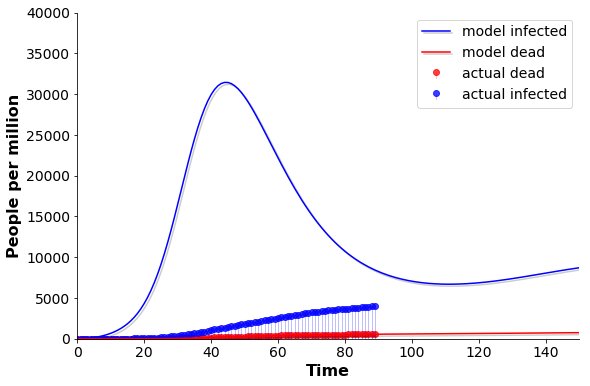

In [25]:
###
#  Curve visualization for dead
###

import matplotlib.patheffects as path_effects

plt.figure(2,figsize=(9,6))

(markers, stemlines, baseline) = plt.stem(t, data_death,bottom=-42,label='actual dead',basefmt=" ")
plt.setp(stemlines, linestyle="-", color="red", linewidth=0.5,alpha=0.5 )
plt.setp(markers, color="red",alpha=0.75 )

(markers, stemlines, baseline) = plt.stem(t, data_infection,bottom=-42,label='actual infected',basefmt=" ")
plt.setp(stemlines, linestyle="-", color="blue", linewidth=0.5,alpha=0.5 )
plt.setp(markers, color="blue",alpha=0.75 )


plt.plot(t2,final_model_plot[4],'b-',label='model infected',
         path_effects=[path_effects.SimpleLineShadow(alpha=0.2,rho=0.2),
                       path_effects.Normal()])

# S1,S2,E1,E2,I,D,R = ret.T

plt.plot(t2,final_model_plot[5],'r-',label='model dead',
         path_effects=[path_effects.SimpleLineShadow(alpha=0.2,rho=0.2),
                       path_effects.Normal()])
    
plt.xlabel('Time',fontsize=16,fontweight='bold')
plt.ylabel('People per million',fontsize=16,fontweight='bold')
plt.legend(loc=0,fontsize=14)

plt.ylim(0,40000)
plt.xlim(0,150)


ax=plt.gca()
PlotStyle(ax,'')